##Building NDVI Images From Level-2A Products


After downloading the Level-1C Products, I proceeded to conduct atmospheric, terrain, and cirrus correction using Sen2Cor, a processor for Sentinel-2 Level 2A products. Sen2Cor also creates aerosol optical thickness, water vapor, scene classification maps, and quality indicators for cloud and snow probabilities. The output images were in 60m, 20m, and 10m resolutions, and the process was done in the command prompt. Each image took approximately 45 minutes to perform the atmospheric correction. I was able to do this for all of the Level-1C products except for products from early 2016. This was because the metadata structure during that time had problems, making them incompatible for processing. Before conducting NDVI calculations for the processed images, I also had to convert the file format from JP2000 to GeoTiff. I performed this using GDAL_Translate in the command prompt as well. 

After format conversion, the images are ready for spatial analysis. Again, there are many ways to perform analysis. I chose to use rasterio, which is a python API that reads and writes raster data. It is a powerful tool that could be used for batch processing a large amount of geographic information. I originally wrote multiple loops using dictionaries and lists to batch process the images that I wanted to convert to NDVI. However, due to the large quantity of the data, the calculations exceeded my computer's RAM memory, resulting in memory error. This led me to break apart the code structure for the batch process and run the process in smaller chunks. Below is the code where I manipulated the matrices of the raster data set to calculate NDVI. All of the NDVI images, Level-1C, and Level-2A products could be found in the project Google Drive.

For future work, a few more Level-1C Products are being prepared on PEPS. I will add those images to the collection once they become available. The processed images will also be used to calculate the NDVI value for each farm. The calculation process could be done by uploading it to Google Earth Engine, where I have created an algorithm to do the calculation, or it could be done on GIS software. The NDVI images from the first half of this project could be used to supplement the NDVI values that are calculated in the second half of this poject, where I examined three months composites images of Peurto Rico from March 2017 to December 2019. 

<img src='sen2corpic.png' /> ![](C:python_workfolder/sen2corpic.png) 
Fig1. Sen2Cor Processing 

In [1]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
path = 'C:/python_workfolder/pr_sentinel2_lv1/gtiff files/'
dir_list = os.listdir(path)
for item in dir_list:
    print(item)
def calculate_ndvi(nir, red):
    ndvi = np.where(
    (nir+red)==0., 
    0, 
    (nir-red)/(nir+red))
    return ndvi

1T19QGA_20151006T150746_B02_10m.tif
1T19QGA_20151006T150746_B03_10m.tif
1T19QGA_20151006T150746_B04_10m.tif
1T19QGA_20151006T150746_B08_10m.tif
1T19QGA_20160413T150702_B02_10m.tif
1T19QGA_20160413T150702_B03_10m.tif
1T19QGA_20160413T150702_B04_10m.tif
1T19QGA_20160413T150702_B08_10m.tif
1T19QGA_20160503T150722_B02_10m.tif
1T19QGA_20160503T150722_B03_10m.tif
1T19QGA_20160503T150722_B04_10m.tif
1T19QGA_20160503T150722_B08_10m.tif
1T19QGA_20161129T150722_B02_10m.tif
1T19QGA_20161129T150722_B03_10m.tif
1T19QGA_20161129T150722_B04_10m.tif
1T19QGA_20161129T150722_B08_10m.tif
1T19QGA_20171020T150709_B02_10m.tif
1T19QGA_20171020T150709_B03_10m.tif
1T19QGA_20171020T150709_B04_10m.tif
1T19QGA_20171020T150709_B08_10m.tif
1T19QGA_20171209T150709_B02_10m.tif
1T19QGA_20171209T150709_B03_10m.tif
1T19QGA_20171209T150709_B04_10m.tif
1T19QGA_20171209T150709_B08_10m.tif
test.tiff


In [3]:
#Only band 4 and band 8 is loaded. I divided them up into chunks to prevent memory overload.
band4_20151006 = rasterio.open('C:/python_workfolder/pr_sentinel2_lv1/gtiff files/%s'%(dir_list[2]))
band8_20151006 = rasterio.open('C:/python_workfolder/pr_sentinel2_lv1/gtiff files/%s'%(dir_list[3]))
band4_20160413 = rasterio.open('C:/python_workfolder/pr_sentinel2_lv1/gtiff files/%s'%(dir_list[6]))
band8_20160413 = rasterio.open('C:/python_workfolder/pr_sentinel2_lv1/gtiff files/%s'%(dir_list[7]))

In [4]:
band4_20160503 = rasterio.open('C:/python_workfolder/pr_sentinel2_lv1/gtiff files/%s'%(dir_list[10]))
band8_20160503 = rasterio.open('C:/python_workfolder/pr_sentinel2_lv1/gtiff files/%s'%(dir_list[11]))
band4_20161129 = rasterio.open('C:/python_workfolder/pr_sentinel2_lv1/gtiff files/%s'%(dir_list[14]))
band8_20161129 = rasterio.open('C:/python_workfolder/pr_sentinel2_lv1/gtiff files/%s'%(dir_list[15]))

In [5]:
band4_20171020 = rasterio.open('C:/python_workfolder/pr_sentinel2_lv1/gtiff files/%s'%(dir_list[18]))
band8_20171020 = rasterio.open('C:/python_workfolder/pr_sentinel2_lv1/gtiff files/%s'%(dir_list[19]))
band4_20171209 = rasterio.open('C:/python_workfolder/pr_sentinel2_lv1/gtiff files/%s'%(dir_list[22]))
band8_20171209 = rasterio.open('C:/python_workfolder/pr_sentinel2_lv1/gtiff files/%s'%(dir_list[23]))

In [6]:
red_20151006 = band4_20151006.read(1).astype('float64')
nir_20151006 = band8_20151006.read(1).astype('float64')
red_20160413 = band4_20160413.read(1).astype('float64')
nir_20160413 = band8_20160413.read(1).astype('float64')

In [7]:
red_20160503 = band4_20160503.read(1).astype('float64')
nir_20160503 = band8_20160503.read(1).astype('float64')
red_20161129 = band4_20161129.read(1).astype('float64')
nir_20161129 = band8_20161129.read(1).astype('float64')


In [8]:
red_20171020 = band4_20171020.read(1).astype('float64')
nir_20171020 = band8_20171020.read(1).astype('float64')
red_20171209 = band4_20171209.read(1).astype('float64')
nir_20171209 = band8_20171209.read(1).astype('float64')

In [9]:
band4_20151006.width

10980

In [11]:
#This shows the image presented in matrix form
band_list1 = [red_20151006, nir_20151006, red_20160413, nir_20160413]
print(band_list1[0])
band_list2 = [red_20160503, nir_20160503, red_20161129, nir_20161129]
band_list3 = [red_20171020, nir_20171020, red_20171209, nir_20171209]

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [661. 549. 451. ... 853. 868. 711.]
 [669. 648. 473. ... 863. 854. 736.]
 [724. 744. 548. ... 800. 717. 731.]]


In [13]:
print(band_list1[2])

[[  44.   54.   53. ...  777.  573.  301.]
 [  36.   39.   50. ...  565.  390.  199.]
 [  51.   56.   48. ...  292.  158.  131.]
 ...
 [6916. 6024. 6044. ...  348.  466.  514.]
 [6708. 6148. 6180. ...  360.  477.  534.]
 [6860. 6744. 6788. ...  414.  498.  527.]]


In [14]:
#When divisor is zero, the invalid values need to be ignored.
np.seterr(divide = 'ignore', invalid = 'ignore')
ndvi_20151006 = calculate_ndvi(band_list1[1], band_list1[0])
print(ndvi_20151006)
ndvi_20160413 = calculate_ndvi(band_list1[3], band_list1[2])

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.48258317 0.59853748 0.66923359 ... 0.59137725 0.55372751 0.63093693]
 [0.50315633 0.54526316 0.6404409  ... 0.55549833 0.53485839 0.61283535]
 [0.48469751 0.47046263 0.60261059 ... 0.58071279 0.61770195 0.6349563 ]]


In [15]:
ndvi_20160503 = calculate_ndvi(band_list2[1], band_list2[0])
ndvi_20161129 = calculate_ndvi(band_list2[3], band_list2[2])

In [16]:
ndvi_20171020 = calculate_ndvi(band_list3[1], band_list3[0])
ndvi_20171209 = calculate_ndvi(band_list3[3], band_list3[2])

In [18]:
ndviImage = rasterio.open('C:/python_workfolder/pr_sentinel2_lv1/gtiff files/ndvi_20151006.tiff','w',driver='Gtiff',
                          width=band4_20151006.width, 
                          height = band4_20151006.height, 
                          count=1, crs=band4_20151006.crs, 
                          transform=band4_20151006.transform, 
                          dtype='float64')
ndviImage.write(ndvi_20151006,1)
ndviImage.close()


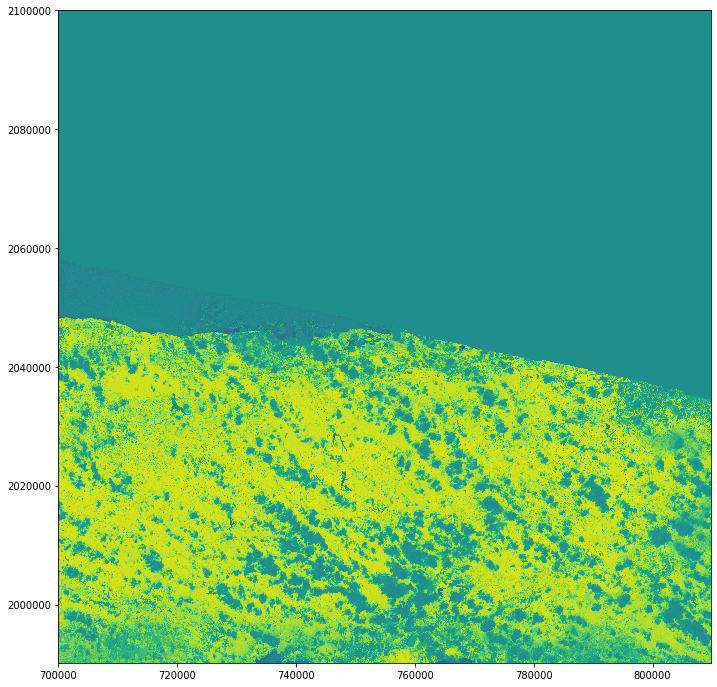

In [29]:
#The downloaded image is replotted for visual confirmation.
ndvi = rasterio.open('C:/python_workfolder/pr_sentinel2_lv1/gtiff files/ndvi_20151006.tiff')
fig = plt.figure(figsize=(18,12))
plot.show(ndvi)
ndvi.close()

In [22]:
ndviImage = rasterio.open('C:/python_workfolder/pr_sentinel2_lv1/gtiff files/ndvi_20160413.tiff','w',driver='Gtiff',
                          width=band4_20160413.width, 
                          height = band4_20160413.height, 
                          count=1, crs=band4_20160413.crs, 
                          transform=band4_20160413.transform, 
                          dtype='float64')
ndviImage.write(ndvi_20160413,1)
ndviImage.close()

In [25]:
ndviImage = rasterio.open('C:/python_workfolder/pr_sentinel2_lv1/gtiff files/ndvi_20160503.tiff','w',driver='Gtiff',
                          width=band4_20160503.width, 
                          height = band4_20160503.height, 
                          count=1, crs=band4_20160503.crs, 
                          transform=band4_20160503.transform, 
                          dtype='float64')
ndviImage.write(ndvi_20160503,1)
ndviImage.close()

In [26]:
ndviImage = rasterio.open('C:/python_workfolder/pr_sentinel2_lv1/gtiff files/ndvi_20161129.tiff','w',driver='Gtiff',
                          width=band4_20161129.width, 
                          height = band4_20161129.height, 
                          count=1, crs=band4_20161129.crs, 
                          transform=band4_20161129.transform, 
                          dtype='float64')
ndviImage.write(ndvi_20161129,1)
ndviImage.close()

In [27]:
ndviImage = rasterio.open('C:/python_workfolder/pr_sentinel2_lv1/gtiff files/ndvi_20171020.tiff','w',driver='Gtiff',
                          width=band4_20171020.width, 
                          height = band4_20171020.height, 
                          count=1, crs=band4_20171020.crs, 
                          transform=band4_20171020.transform, 
                          dtype='float64')
ndviImage.write(ndvi_20171020,1)
ndviImage.close()

In [28]:
ndviImage = rasterio.open('C:/python_workfolder/pr_sentinel2_lv1/gtiff files/ndvi_20171209.tiff','w',driver='Gtiff',
                          width=band4_20171209.width, 
                          height = band4_20171209.height, 
                          count=1, crs=band4_20171209.crs, 
                          transform=band4_20171209.transform, 
                          dtype='float64')
ndviImage.write(ndvi_20171209,1)
ndviImage.close()